In [1]:
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

In [2]:
import pandas as pd

# Correcting the typo in the function name and specifying the correct path
data = pd.read_csv("../data/BrentOilPrices.csv")  # Use the correct function name
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the DataFrame
print(data.head())

C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_8216\4241100378.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [3]:
print(data.isnull().sum())

Date     0
Price    0
dtype: int64


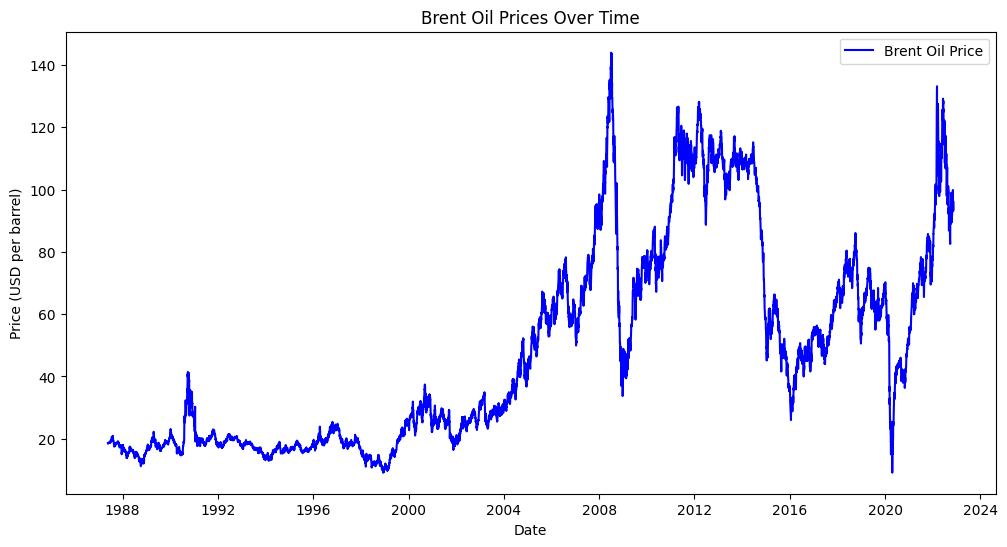

In [4]:
import matplotlib.pyplot as plt

# Plotting the Brent oil prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


In [6]:
# Differencing the series
data['Price_diff'] = data['Price'].diff().dropna()

# Re-run the ADF test on the differenced data
result_diff = adfuller(data['Price_diff'].dropna())
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

ADF Statistic after differencing: -15.52936758004806
p-value after differencing: 2.2307405105160745e-28


<Figure size 1200x600 with 0 Axes>

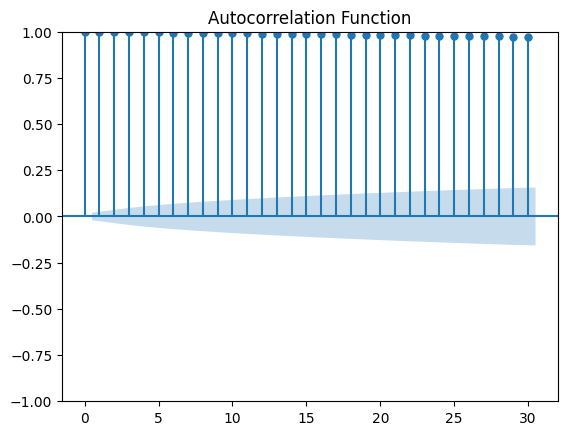

<Figure size 1200x600 with 0 Axes>

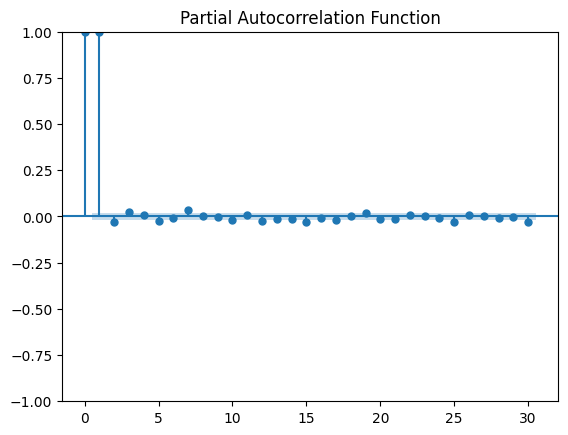

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(data['Price'], lags=30)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Price'], lags=30)
plt.title('Partial Autocorrelation Function')
plt.show()

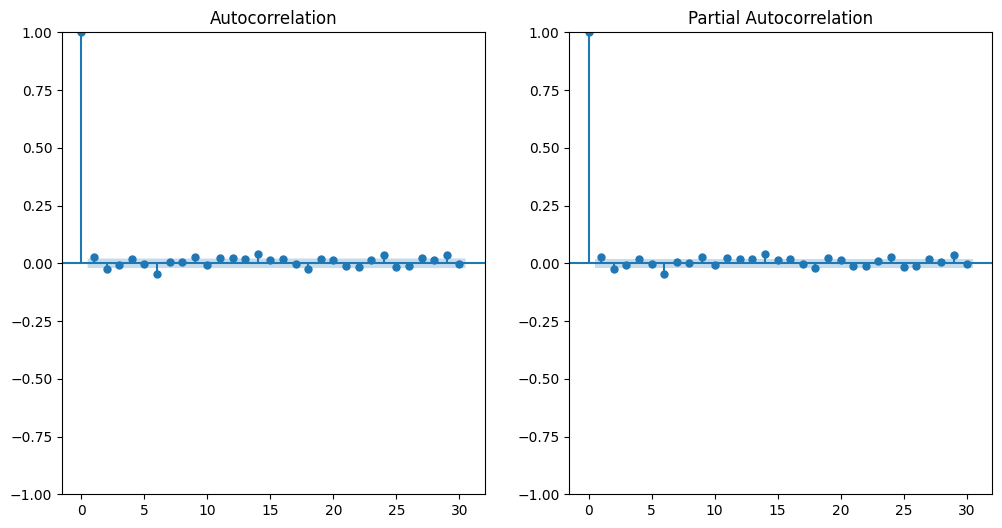

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Tue, 25 Feb 2025   AIC                          29093.899
Time:                        16:12:41   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sm.graphics.tsa.plot_acf(data['Price_diff'].dropna(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(data['Price_diff'].dropna(), lags=30, ax=ax[1])
plt.show()

# Fit the ARIMA model
p = 1  # Set based on ACF/PACF
d = 1  # We differenced once
q = 1  # Set based on ACF/PACF

model = ARIMA(data['Price'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

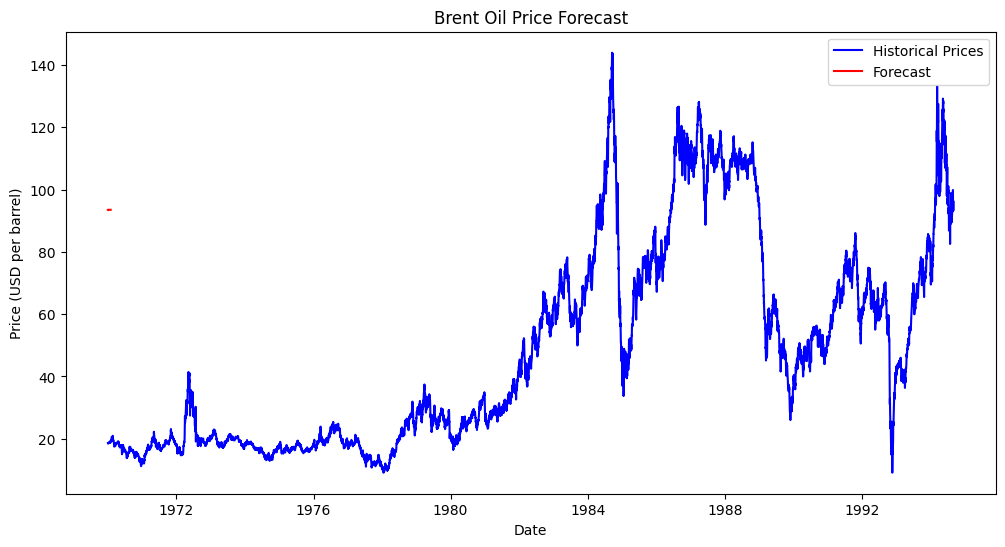

In [9]:
# Forecasting
forecast = model_fit.forecast(steps=30)  # Forecast for the next 30 days

# Plotting the historical prices and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Historical Prices', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title('Brent Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

In [10]:
import sys
sys.path.append(r'C:\Users\Semir AI Legend\Desktop\Oil-price-analysis\scripts')

from analyze_price_with_arima import analyze_brent_prices_with_arima

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported inde

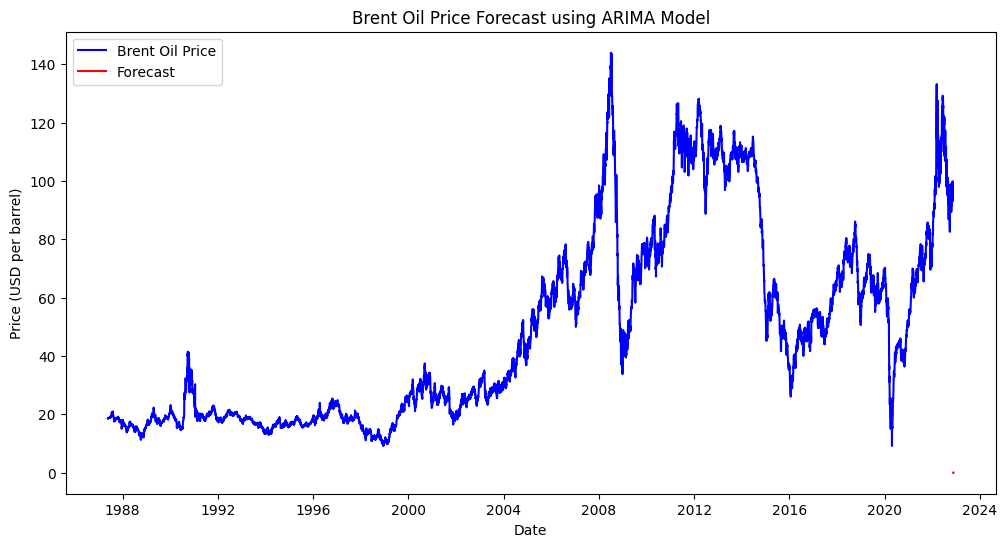

9010   -0.062187
9011    0.006919
9012    0.008676
9013    0.008721
9014    0.008722
Name: predicted_mean, dtype: float64


In [11]:
# Analyze the Brent oil prices using ARIMA
forecast, ms_model_fit = analyze_brent_prices_with_arima(data, forecast_steps=5)

# Display the forecasted values
print(forecast)

In [12]:
from lstm_data import prepare_data_for_lstm

# Prepare data for LSTM
X, y, scaler = prepare_data_for_lstm('../data/BrentOilPrices.csv', time_steps=30)

c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\scripts\lstm_data.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data['Date'] = pd.to_datetime(brent_data['Date'])


In [13]:
from train_lstm import create_and_train_lstm

# Train the LSTM model
model = create_and_train_lstm(X, y, epochs=50, batch_size=32)

Epoch 1/50


c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0087
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4.6841e-04
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 3.6695e-04
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 3.1390e-04
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 2.5862e-04
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 2.4384e-04
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 2.3152e-04
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 1.7698e-04
Epoch 9/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 1.6837e-04
Epoch 10/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.4389e-04
Epoch 11/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.2719e-04
Epoch 12/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.2022e-04
Epoch 13/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.5192e-04
Epoch 14/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.2877e-04

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


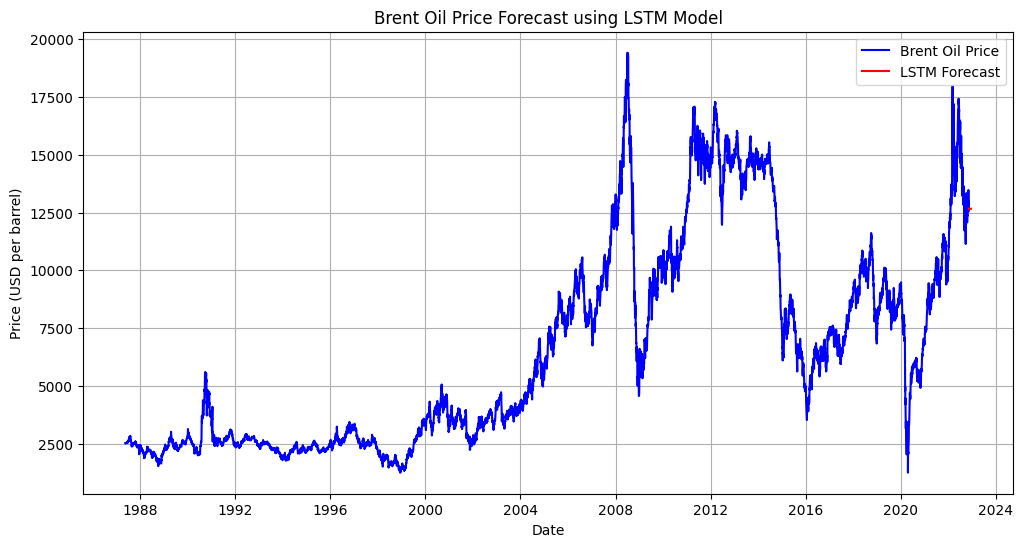

In [ ]:
def forecast_with_lstm(model, scaler, brent_data, time_steps=1, forecast_steps=5):
    # Create the input for forecasting
    last_data = brent_data['Price'].values[-time_steps:]
    last_data = last_data.reshape(-1, 1)
    last_scaled = scaler.transform(last_data)

    X_forecast = []
    for _ in range(forecast_steps):
        X_forecast.append(last_scaled)
        last_scaled = np.append(last_scaled[1:], [[last_scaled[-1]]]).reshape(-1, 1)
    
    X_forecast = np.array(X_forecast)
    X_forecast = np.reshape(X_forecast, (X_forecast.shape[0], X_forecast.shape[1], 1))
    
    # Make predictions
    predictions = model.predict(X_forecast)
    predictions = scaler.inverse_transform(predictions)  # Reverse scaling

    return predictions
def plot_lstm_predictions(brent_data, predictions, scaler, time_steps=30):
    # Inverse transform the predictions to original scale
    predictions_inverse = scaler.inverse_transform(predictions)

    # Prepare historical data for plotting
    train_data = brent_data['Price'].values
    train_data_inverse = scaler.inverse_transform(train_data.reshape(-1, 1))

    # Create an array for the total length of the time series
    full_data = np.empty((len(train_data) + len(predictions),))
    full_data[:len(train_data)] = train_data_inverse[:, 0]
    full_data[len(train_data):] = np.nan  # Placeholder for predictions

    # Plot the historical data
    plt.figure(figsize=(12, 6))
    plt.plot(brent_data.index, train_data_inverse, label='Brent Oil Price', color='blue')

    # Create forecast index
    forecast_index = pd.date_range(start=brent_data.index[-1] + pd.Timedelta(days=1), 
                                    periods=len(predictions))

    # Plot the predictions
    plt.plot(forecast_index, predictions_inverse, label='LSTM Forecast', color='red')

    plt.title('Brent Oil Price Forecast using LSTM Model')
    plt.xlabel('Date')
    plt.ylabel('Price (USD per barrel)')
    plt.legend()
    plt.grid()
    plt.show()

forecast_with_lstm(model, scaler, data, time_steps=30, forecast_steps=30)
plot_lstm_predictions(data, forecast_with_lstm(model, scaler, data, time_steps=30, forecast_steps=30), scaler, time_steps=30)

In [28]:
import pandas as pd

# Load the file, ensuring all columns are read
file_path = "../data/BrentOilPrices.csv"  # Update with actual path
data = pd.read_csv(file_path)

# Print the first few rows to inspect
print(data.head())
print(data.columns)


        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63
Index(['Date', 'Price'], dtype='object')


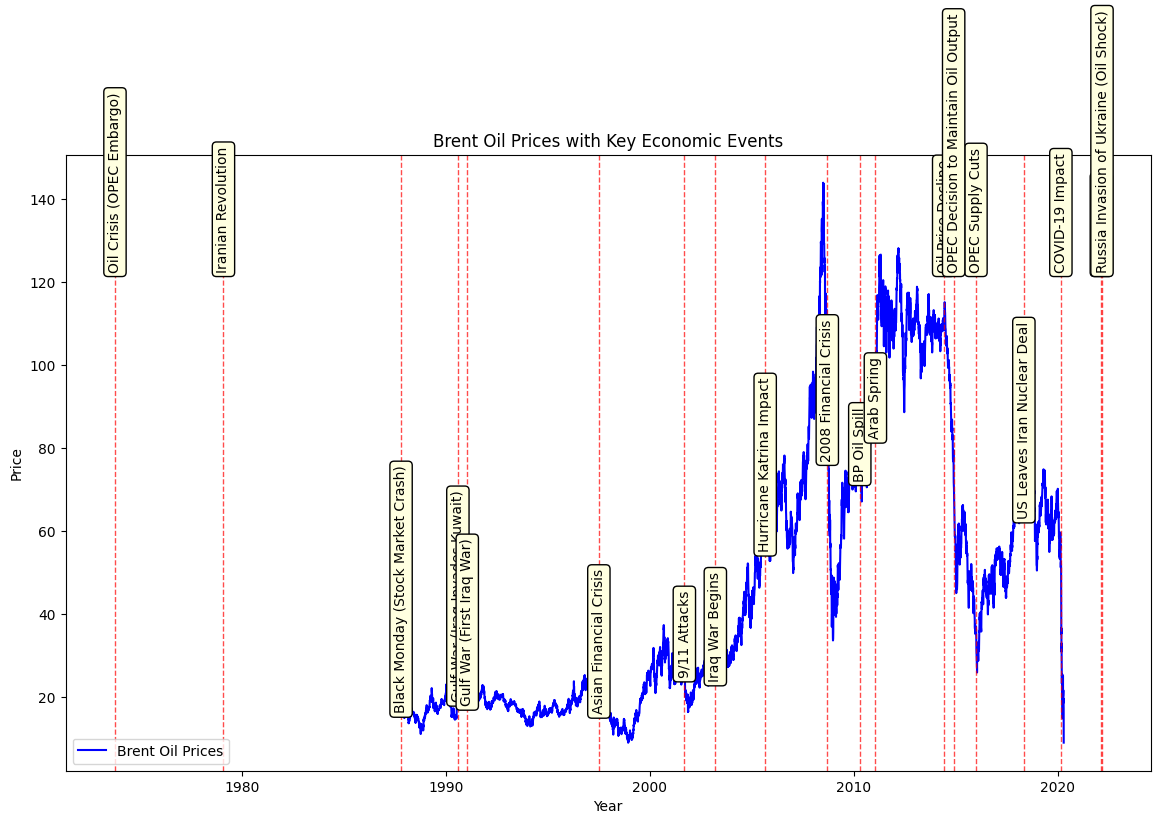

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Remove any rows with invalid or missing dates
data = data.dropna(subset=['Date'])

# Extended list of events to annotate
events = {
    '1987-10-19': 'Black Monday (Stock Market Crash)',
    '1990-08-02': 'Gulf War (Iraq Invades Kuwait)',
    '1997-07-02': 'Asian Financial Crisis',
    '2001-09-11': '9/11 Attacks',
    '2003-03-20': 'Iraq War Begins',
    '2008-09-15': '2008 Financial Crisis',
    '2010-04-20': 'BP Oil Spill',
    '2011-01-25': 'Arab Spring',
    '2014-06-01': 'Oil Price Decline',
    '2016-01-01': 'OPEC Supply Cuts',
    '2020-03-01': 'COVID-19 Impact',
    '2022-02-24': 'Ukraine Crisis',
    '1973-10-06': 'Oil Crisis (OPEC Embargo)',
    '1979-02-01': 'Iranian Revolution',
    '1991-01-17': 'Gulf War (First Iraq War)',
    '2005-08-29': 'Hurricane Katrina Impact',
    '2014-11-27': 'OPEC Decision to Maintain Oil Output',
    '2018-05-08': 'US Leaves Iran Nuclear Deal',
    '2022-03-08': 'Russia Invasion of Ukraine (Oil Shock)'
}

# Plotting the Brent oil prices
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Price'], label='Brent Oil Prices', color='blue')

# Loop over each event in the dictionary to add vertical lines and annotations
for date, label in events.items():
    event_date = pd.to_datetime(date)
    event_price = data.loc[data['Date'] == event_date, 'Price'].max() if event_date in data['Date'].values else data['Price'].max()
    
    # Draw a vertical line for the event
    plt.axvline(x=event_date, color='red', linestyle='--', linewidth=1, alpha=0.7)
    
    # Annotate the event
    plt.annotate(label, 
                 xy=(event_date, event_price * 0.8), 
                 xytext=(event_date, event_price * 0.85),
                 rotation=90, color='black', 
                 ha='center', va='bottom', fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow"))

# Adding labels and title
plt.title('Brent Oil Prices with Key Economic Events')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

# GDP

In [67]:
# Step 1: Import necessary libraries
import wbdata
import pandas as pd
import datetime
import matplotlib.pyplot as plt
start_date = datetime.datetime(1987, 5, 20)
end_date = datetime.datetime(2022, 9, 30)

countries = ['USA', 'EUU', 'CHN']  # 'EUU' is the World Bank code for the European Union
gdp_data = wbdata.get_dataframe({'NY.GDP.MKTP.CD': 'GDP Growth (%)'}, country=countries)
gdp_data.reset_index(inplace=True)
print(gdp_data.dtypes)  # Check the data types of your columns
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data = gdp_data[(gdp_data['date'] >= start_date) & (gdp_data['date'] <= end_date)]
print(gdp_data)
inflation_data = wbdata.get_dataframe({'FP.CPI.TOTL': 'Inflation Rate (%)'}, country=countries)
inflation_data.reset_index(inplace=True)
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
inflation_data = inflation_data[(inflation_data['date'] >= start_date) & (inflation_data['date'] <= end_date)]

print(inflation_data)
unemployment_data = wbdata.get_dataframe({'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)'}, country=countries)
unemployment_data.reset_index(inplace=True)
unemployment_data['date'] = pd.to_datetime(unemployment_data['date'])

unemployment_data = unemployment_data[(unemployment_data['date'] >= start_date) & (unemployment_data['date'] <= end_date)]

print(unemployment_data)
exchange_rate_data = wbdata.get_dataframe({'PA.NUS.FCRF': 'Exchange Rate (Local Currency per USD)'}, country=countries)

exchange_rate_data.reset_index(inplace=True)
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'])
exchange_rate_data = exchange_rate_data[(exchange_rate_data['date'] >= start_date) & (exchange_rate_data['date'] <= end_date)]

print(exchange_rate_data)
renewable_energy_data = wbdata.get_dataframe({'EG.FEC.RNEW.ZS': 'Renewable Energy Consumption (% of total energy)'}, country=countries)
renewable_energy_data.reset_index(inplace=True)
renewable_energy_data['date'] = pd.to_datetime(renewable_energy_data['date'])
renewable_energy_data = renewable_energy_data[(renewable_energy_data['date'] >= start_date) & (renewable_energy_data['date'] <= end_date)]

try:
    env_regulations_data = wbdata.get_dataframe({'CC.ENTX.ENV.ZS': 'Total Environmental Tax Revenue (% of GDP)'}, country=countries)
    env_regulations_data.reset_index(inplace=True)
    env_regulations_data['date'] = pd.to_datetime(env_regulations_data['date'])
    print("Environmental Regulations Data:")
    print(env_regulations_data)
except Exception as e:
    print(f"Error fetching environmental regulations data: {e}")

try:
    trade_data = wbdata.get_dataframe({'BN.GSR.GNFS.CD': 'Net Trade in Goods and Services (BoP, current US$)'}, country=countries)
    trade_data.reset_index(inplace=True)
    trade_data['date'] = pd.to_datetime(trade_data['date'])
    print("Trade Policies Data:")
    print(trade_data)
except Exception as e:
    print(f"Error fetching trade policies data: {e}")
natural_gas_indicator = 'EG.ELC.NGAS.ZS'  # Electricity production from natural gas sources (% of total)

try:
    natural_gas_data = wbdata.get_dataframe({natural_gas_indicator: 'Electricity Production from Natural Gas (%)'}, country=countries)
    
    # Check if the data is returned as expected
    if natural_gas_data is None or natural_gas_data.empty:
        raise ValueError("No data returned for the specified indicator.")

    # Reset index for easier manipulation
    natural_gas_data.reset_index(inplace=True)
    natural_gas_data['date'] = pd.to_datetime(natural_gas_data['date'])
    print("Natural Gas Data:")
    print(natural_gas_data)
except Exception as e:
    print(f"Error fetching natural gas data: {e}")

country            object
date               object
GDP Growth (%)    float64
dtype: object
           country       date  GDP Growth (%)
1            China 2022-01-01    1.788178e+13
2            China 2021-01-01    1.782046e+13
3            China 2020-01-01    1.468774e+13
4            China 2019-01-01    1.427997e+13
5            China 2018-01-01    1.389491e+13
..             ...        ...             ...
159  United States 1992-01-01    6.520327e+12
160  United States 1991-01-01    6.158129e+12
161  United States 1990-01-01    5.963144e+12
162  United States 1989-01-01    5.641580e+12
163  United States 1988-01-01    5.236438e+12

[105 rows x 3 columns]
           country       date  Inflation Rate (%)
1            China 2022-01-01          131.919357
2            China 2021-01-01          129.366217
3            China 2020-01-01          128.109444
4            China 2019-01-01          125.083154
5            China 2018-01-01          121.558878
..             ...        ...   

In [68]:
import pandas as pd

inflation_data = pd.DataFrame(inflation_data)
print(inflation_data.head()) 

  country       date  Inflation Rate (%)
1   China 2022-01-01          131.919357
2   China 2021-01-01          129.366217
3   China 2020-01-01          128.109444
4   China 2019-01-01          125.083154
5   China 2018-01-01          121.558878


In [69]:
oil_file_path = r"../data/BrentOilPrices.csv"
brent_data = pd.read_csv(oil_file_path)

# Specify the date format explicitly (modify this based on your actual date format in the CSV)
brent_data['Date'] = pd.to_datetime(brent_data['Date'], format='%Y-%m-%d', errors='coerce')

# Set 'Date' as the index
brent_data.set_index('Date', inplace=True)

# Reset index, and rename 'Date' to 'date' for consistency
brent_data.reset_index(inplace=True)
brent_data.rename(columns={'Date': 'date'}, inplace=True)

# Check the dataframe
print(brent_data.head())

  date  Price
0  NaT  18.63
1  NaT  18.45
2  NaT  18.55
3  NaT  18.60
4  NaT  18.63


In [75]:
# Read the data with the correct date format
brent_data = pd.read_csv(oil_file_path)

# Specify the correct format for the date column
brent_data['Date'] = pd.to_datetime(brent_data['Date'], format='%d-%b-%y', errors='coerce')

# Set 'Date' as the index
brent_data.set_index('Date', inplace=True)

# Reset index, and rename 'Date' to 'date' for consistency
brent_data.reset_index(inplace=True)
brent_data.rename(columns={'Date': 'date'}, inplace=True)

# Check the dataframe
print(brent_data.head())

        date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [77]:
# to datetime
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
brent_data['date'] = pd.to_datetime(brent_data['date'])
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
env_regulations_data['date'] = pd.to_datetime(env_regulations_data['date'])
trade_data['date'] = pd.to_datetime(trade_data['date'])
renewable_energy_data['date'] = pd.to_datetime(renewable_energy_data['date'])
unemployment_data['date'] = pd.to_datetime(unemployment_data['date'])
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'])

#extract year
gdp_data['year'] = gdp_data['date'].dt.year
brent_data['year'] = brent_data['date'].dt.year 
inflation_data['year'] = inflation_data['date'].dt.year 
env_regulations_data['year'] = env_regulations_data['date'].dt.year 
trade_data['year'] = trade_data['date'].dt.year 
renewable_energy_data['year'] = renewable_energy_data['date'].dt.year 
unemployment_data['year'] = unemployment_data['date'].dt.year 
exchange_rate_data['year'] = exchange_rate_data['date'].dt.year 

In [89]:
# merge
all_data = brent_data.merge(gdp_data,on='year',how='left')
all_data = all_data.merge(inflation_data[['Inflation Rate (%)','year']],on='year',how='left')
all_data = all_data.merge(env_regulations_data[['Total Environmental Tax Revenue (% of GDP)','year']], on='year', how='left')
all_data = all_data.merge(trade_data[['Net Trade in Goods and Services (BoP, current US$)','year']], on='year',how='left')
all_data = all_data.merge(renewable_energy_data[['Renewable Energy Consumption (% of total energy)','year']], on='year', how='left')
all_data = all_data.merge(exchange_rate_data[['Exchange Rate (Local Currency per USD)','year']],on='year',how='left')
all_data = all_data.merge(unemployment_data[['Unemployment Rate (%)','country','year']], on='year', how='left')

In [91]:
all_data.head()

,date,Price,year,GDP Growth (%),Inflation Rate (%),Total Environmental Tax Revenue (% of GDP)
0,1987-05-20,18.63,1987.0,NaN,NaN,NaN
1,1987-05-20,18.63,1987.0,NaN,NaN,NaN
2,1987-05-21,18.45,1987.0,NaN,NaN,NaN
3,1987-05-21,18.45,1987.0,NaN,NaN,NaN
4,1987-05-22,18.55,1987.0,NaN,NaN,NaN


In [92]:
# Separate numeric and non-numeric columns
numeric_columns = all_data.select_dtypes(include='number').columns
non_numeric_columns = all_data.select_dtypes(exclude='number').columns

# Fill NaN values in numeric columns with the median
all_data[numeric_columns] = all_data[numeric_columns].fillna(all_data[numeric_columns].median())

# Check the info and null values
all_data.info()
print(f'null values \n\n{all_data.isna().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148571 entries, 0 to 148570
Data columns (total 6 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   date                                        147920 non-null  datetime64[ns]
 1   Price                                       148571 non-null  float64       
 2   year                                        148571 non-null  float64       
 3   GDP Growth (%)                              148571 non-null  float64       
 4   Inflation Rate (%)                          148571 non-null  float64       
 5   Total Environmental Tax Revenue (% of GDP)  148571 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.8 MB
null values 

date                                          651
Price                                           0
year                                            0
GDP Growth (%)     

In [93]:
# Fill missing date with the first date in the dataset
placeholder_date = all_data['date'].min()
all_data['date'] = all_data['date'].fillna(placeholder_date)


In [94]:
all_data = all_data.reset_index()
all_data.fillna(all_data.median(), inplace=True)
all_data.info()
print(f'null values \n\n{all_data.isna().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148571 entries, 0 to 148570
Data columns (total 7 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   index                                       148571 non-null  int64         
 1   date                                        148571 non-null  datetime64[ns]
 2   Price                                       148571 non-null  float64       
 3   year                                        148571 non-null  float64       
 4   GDP Growth (%)                              148571 non-null  float64       
 5   Inflation Rate (%)                          148571 non-null  float64       
 6   Total Environmental Tax Revenue (% of GDP)  148571 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 7.9 MB
null values 

index                                         0
date                          

In [95]:
all_data.head()

,index,date,Price,year,GDP Growth (%),Inflation Rate (%),Total Environmental Tax Revenue (% of GDP)
0,0,1987-05-20,18.63,1987.0,8.532185e+12,84.999377,0.713
1,1,1987-05-20,18.63,1987.0,8.532185e+12,84.999377,0.713
2,2,1987-05-21,18.45,1987.0,8.532185e+12,84.999377,0.713
3,3,1987-05-21,18.45,1987.0,8.532185e+12,84.999377,0.713
4,4,1987-05-22,18.55,1987.0,8.532185e+12,84.999377,0.713


In [98]:
print(all_data.columns)


Index(['index', 'date', 'Price', 'year', 'GDP Growth (%)',
       'Inflation Rate (%)', 'Total Environmental Tax Revenue (% of GDP)'],
      dtype='object')


In [100]:
all_data = all_data[['date', 'Price', 'year', 'GDP Growth (%)', 
                     'Inflation Rate (%)', 'Total Environmental Tax Revenue (% of GDP)']]
all_data.describe()

,date,Price,year,GDP Growth (%),Inflation Rate (%),Total Environmental Tax Revenue (% of GDP)
count,148571,148571.000000,148571.000000,1.485710e+05,148571.000000,148571.000000
mean,2004-01-14 18:08:10.092951936,47.059936,2003.615187,9.258544e+12,85.779065,0.723227
min,1987-05-20 00:00:00,9.100000,1987.000000,3.123536e+11,33.187245,0.713000
25%,1995-11-21 00:00:00,18.900000,1996.000000,5.236438e+12,80.970022,0.713000
50%,2004-01-16 00:00:00,33.340000,2004.000000,8.532185e+12,84.999377,0.713000
75%,2012-03-08 00:00:00,67.790000,2012.000000,1.447423e+13,96.922399,0.713000
max,2020-04-21 00:00:00,143.950000,2020.000000,2.153998e+13,128.109444,1.391000
std,NaN,32.595374,9.337344,5.624070e+12,18.469510,0.082639


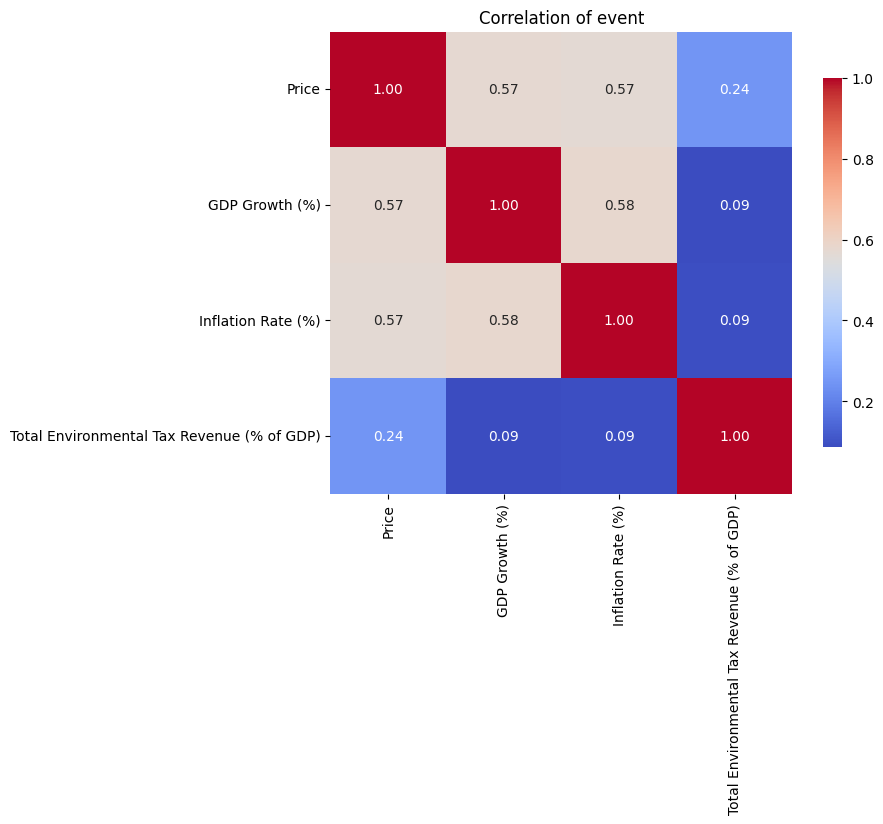

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop columns that are not needed for correlation analysis
cor_data = all_data.drop(columns=['date', 'year'])

# Calculate correlation
correlation = cor_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation of event')
plt.show()

In [108]:
merged_data = all_data

Correlation between Brent Oil Prices and GDP Growth: 0.57


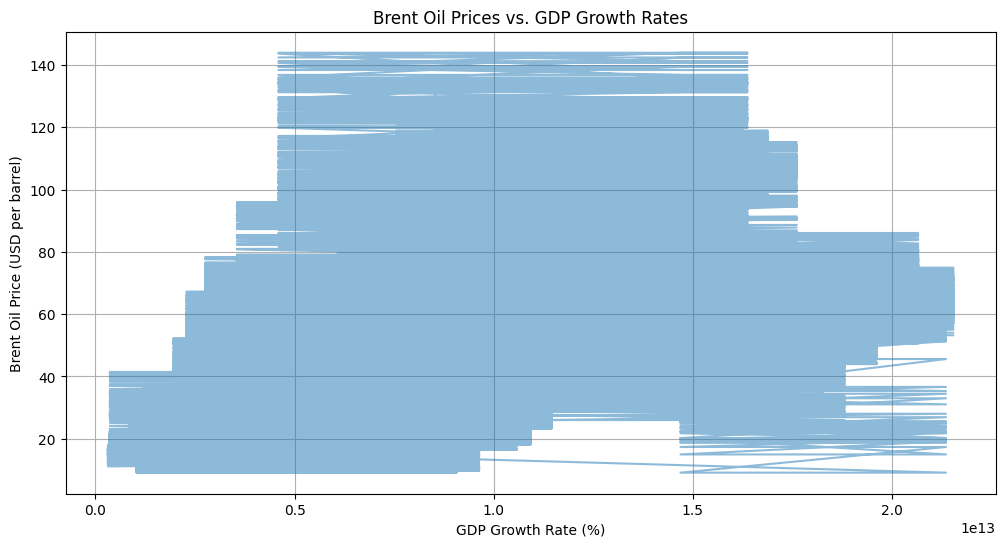

In [109]:
# Step 15: Analyze correlation
correlation = merged_data['Price'].corr(merged_data['GDP Growth (%)'])
print(f"Correlation between Brent Oil Prices and GDP Growth: {correlation:.2f}")

# Step 16: Visualize the relationship
plt.figure(figsize=(12, 6))
plt.plot(merged_data['GDP Growth (%)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. GDP Growth Rates')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()

Correlation between Brent Oil Prices and Inflation Rate: 0.57


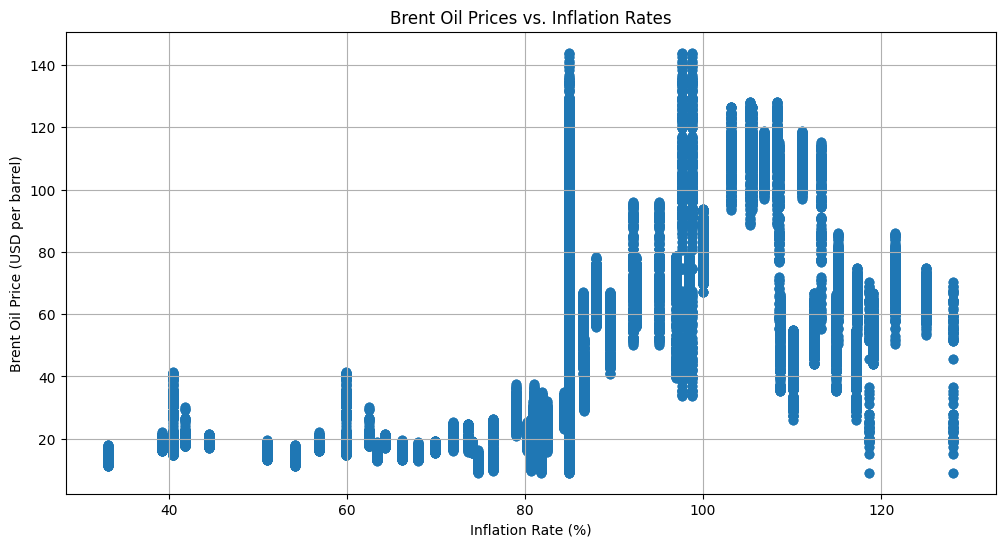

In [110]:
correlation = merged_data['Price'].corr(merged_data['Inflation Rate (%)'])
print(f"Correlation between Brent Oil Prices and Inflation Rate: {correlation:.2f}")

# Optionally, visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Inflation Rate (%)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. Inflation Rates')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()